<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-255-Data_Mining/blob/main/Assignment_11/GBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [6]:
class GBMFromScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        # Initialize with mean of y
        self.initial_prediction = np.mean(y)
        residual = y - self.initial_prediction

        for _ in range(self.n_estimators):
            # Fit a weak learner to the residual
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            model.fit(X, residual)
            self.models.append(model)

            # Predict and update residual
            residual -= self.learning_rate * model.predict(X)

    def predict(self, X):
        # Start with the initial prediction
        predictions = np.full(X.shape[0], self.initial_prediction)
        for model in self.models:
            predictions += self.learning_rate * model.predict(X)
        return predictions


In [7]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
# Generate synthetic data
X, y = make_regression(n_samples=500, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train GBM from scratch
gbm = GBMFromScratch(n_estimators=50, learning_rate=0.1, max_depth=1)
gbm.fit(X_train, y_train)

In [10]:
# Predict and evaluate
y_pred_train = gbm.predict(X_train)
y_pred_test = gbm.predict(X_test)

In [11]:
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))

Train MSE: 181.2822675163034
Test MSE: 155.40645353847194


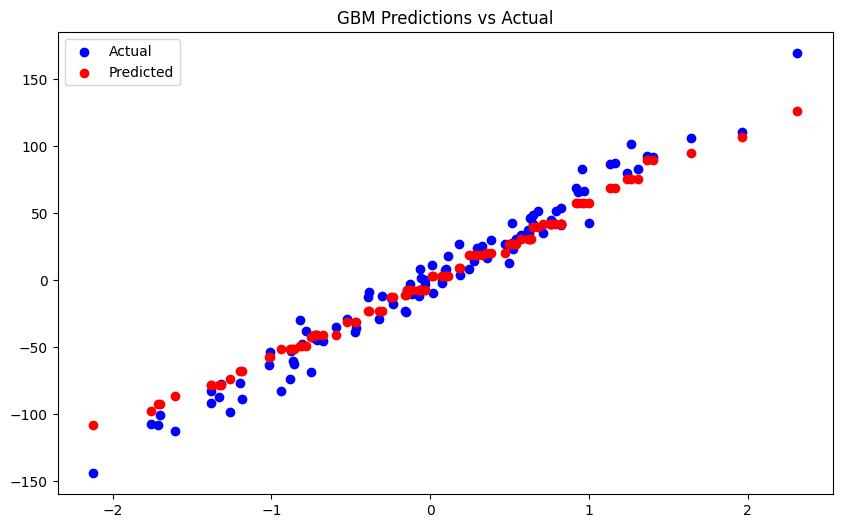

In [12]:
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.scatter(X_test, y_pred_test, label='Predicted', color='red')
plt.title('GBM Predictions vs Actual')
plt.legend()
plt.show()

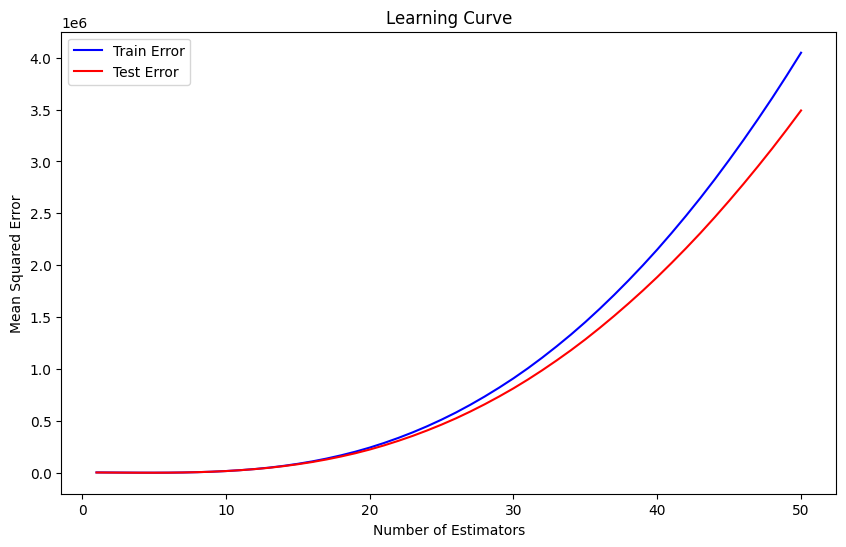

In [13]:
# Plot learning curve
train_errors = []
test_errors = []
residual = y_train - np.mean(y_train)
gbm_partial = GBMFromScratch(n_estimators=1, learning_rate=0.1, max_depth=1)

for i in range(1, gbm.n_estimators + 1):
    gbm_partial.n_estimators = i
    gbm_partial.fit(X_train, y_train)
    train_errors.append(mean_squared_error(y_train, gbm_partial.predict(X_train)))
    test_errors.append(mean_squared_error(y_test, gbm_partial.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(range(1, gbm.n_estimators + 1), train_errors, label='Train Error', color='blue')
plt.plot(range(1, gbm.n_estimators + 1), test_errors, label='Test Error', color='red')
plt.title('Learning Curve')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [4]:
# Save predictions
predictions_df = pd.DataFrame({
    "X": X_test.flatten(),
    "y_actual": y_test,
    "y_pred": y_pred_test
})
predictions_df.to_csv("gbm_predictions.csv", index=False)

# Download the file
from google.colab import files
files.download("gbm_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>